In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('clean_data2016.csv', index_col = 0)

In [3]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:00,0.0,failed,0,GB,0.0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:00,45000.0,2013-01-12 00:20:00,220.0,failed,3,US,220.0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:00,5000.0,2012-03-17 03:24:00,1.0,failed,1,US,1.0
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:00,1283.0,canceled,14,US,1283.0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:00,50000.0,2016-02-26 13:38:00,52375.0,successful,224,US,52375.0


In [45]:
df.describe()

,goal,backers,usd_pledged
count,3.199530e+05,319953.000000,3.199530e+05
mean,4.761360e+04,102.719706,7.838580e+03
std,1.145230e+06,939.483840,8.460305e+04
min,1.000000e-02,0.000000,0.000000e+00
25%,2.000000e+03,2.000000,2.500000e+01
50%,5.000000e+03,12.000000,5.350000e+02
75%,1.500000e+04,55.000000,3.571000e+03
max,1.000000e+08,219382.000000,2.033899e+07


In [53]:
df.shape

(319953, 10)

Since we are interested in the 'state' column, which will tell us whether or not a project was successful, let's take a look at some high level data visuals

Text(0.5, 1.0, '2016 Kickstarter Project State')

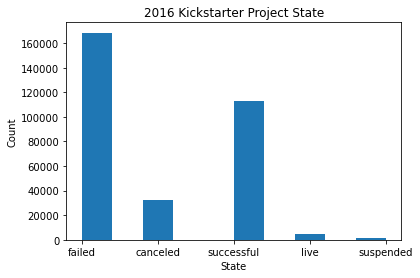

In [4]:
plt.hist(df['state'])
plt.xlabel('State')
plt.ylabel('Count')
plt.title('2016 Kickstarter Project State')

It looks like more projects failed then were successful. Let's take a look at pair plots to see if there are any initial correlations but before doing so, let's get rid of the ID, name, and pledge columns. The ID and Name are not necessary columns to compare since they are are unique and wouldn't have an impact on the success of a project. We should also get rid of the pledge column since this the last column "usd_pledge" will give us a more accurate picture with all in USD. 

In [6]:
df.drop(['ID', 'name', 'pledged'], axis=1, inplace = True)

In [7]:
df.head()

,category,main_category,currency,deadline,goal,launched,state,backers,country,usd_pledged
0,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:00,failed,0,GB,0.0
1,Narrative Film,Film & Video,USD,2013-02-26 00:20:00,45000.0,2013-01-12 00:20:00,failed,3,US,220.0
2,Music,Music,USD,2012-04-16 04:24:00,5000.0,2012-03-17 03:24:00,failed,1,US,1.0
3,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:00,canceled,14,US,1283.0
4,Restaurants,Food,USD,2016-04-01 13:38:00,50000.0,2016-02-26 13:38:00,successful,224,US,52375.0


In [3]:
df.dtypes

ID                 int64
name              object
category          object
main_category     object
currency          object
deadline          object
goal             float64
launched          object
pledged          float64
state             object
backers            int64
country           object
usd_pledged      float64
dtype: object

In [5]:
df = df.astype({'category':'category', 
                'main_category':'category', 
                'currency':'category',
                'deadline':'datetime64', 
                'launched':'datetime64', 
                'state' : 'category',
                'backers' : 'int64', 
                'country' : 'category',
                'usd_pledged':'float'})

In [6]:
df.dtypes

ID                        int64
name                     object
category               category
main_category          category
currency               category
deadline         datetime64[ns]
goal                    float64
launched         datetime64[ns]
pledged                 float64
state                  category
backers                   int64
country                category
usd_pledged             float64
dtype: object

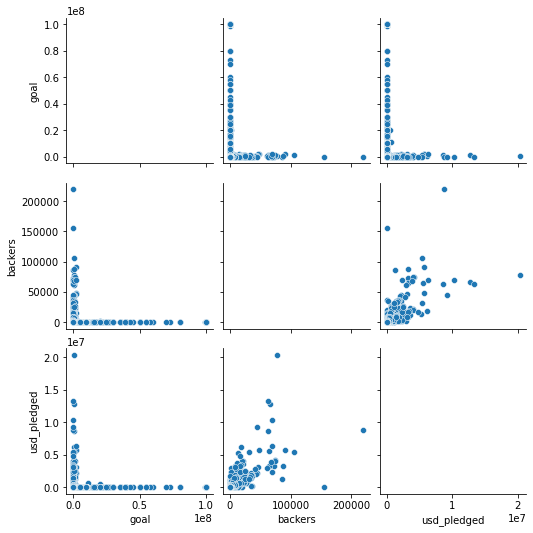

In [16]:
sns.pairplot(df, ci = None)


It looks like out of the numeric data, the 'backers' column may have some correlation to pledge amount, which makes sense, every pledge amount has a backer, but this doesn't tell us much yet. Let's plot some of the categorical data too.  

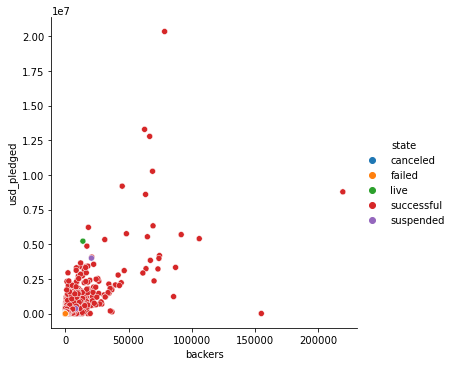

In [55]:
sns.relplot(data = df, x = 'backers', y = 'usd_pledged', hue = 'state', ci = None)


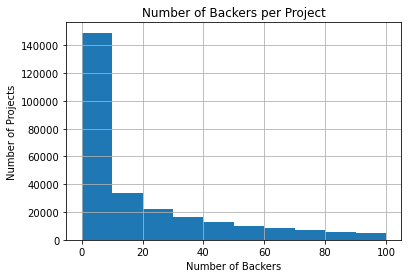

In [48]:
df['backers'].hist(range = (0, 100))
plt.xlabel('Number of Backers')
plt.ylabel('Number of Projects')
plt.title('Number of Backers per Project')
plt.show()

This shows us that the majority of projects had less than 20 backers. 

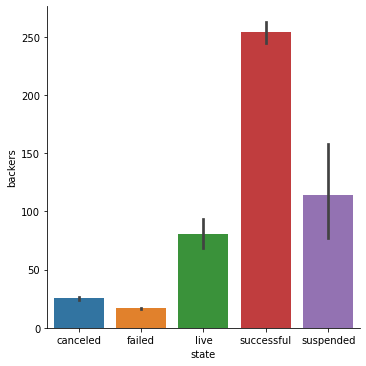

In [9]:
sns.catplot(kind = 'bar', data = df, x ='state', y = 'backers')

<AxesSubplot:xlabel='state', ylabel='backers'>

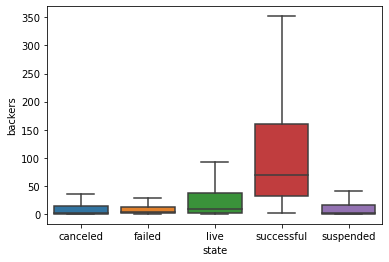

In [15]:
sns.boxplot(data = df,  x = 'state', y = 'backers', showfliers = False)

In [24]:
df.main_category.value_counts

<bound method IndexOpsMixin.value_counts of 0           Publishing
1         Film & Video
2                Music
3         Film & Video
4                 Food
              ...     
305503         Fashion
104120      Publishing
145502         Fashion
264243    Film & Video
269970          Comics
Name: main_category, Length: 319953, dtype: category
Categories (15, object): ['Art', 'Comics', 'Crafts', 'Dance', ..., 'Photography', 'Publishing', 'Technology', 'Theater']>

In [31]:
successful = df[df['state'] == 'successful']
successful.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:00,50000.0,2016-02-26 13:38:00,52375.0,successful,224,US,52375.0
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:00,1000.0,2014-12-01 18:30:00,1205.0,successful,16,US,1205.0
10,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08 06:42:00,12500.0,2013-03-09 06:42:00,12700.0,successful,100,US,12700.0
16,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17 14:11:00,250.0,2012-08-02 14:11:00,250.0,successful,7,US,250.0
18,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30 07:06:00,20000.0,2013-11-25 07:06:00,34268.0,successful,624,US,34268.0


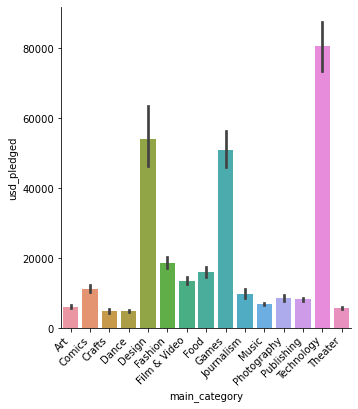

In [49]:
sns.catplot(kind = 'bar', data = successful, x = 'main_category', y ='usd_pledged')
plt.xticks(rotation = 45, ha = 'right');

From this, it looks like the Technology, Design, and Games have much more pledge dollars compared to the other categories out of successful projects. Would this be the same if we look at all projects regardless of state? 

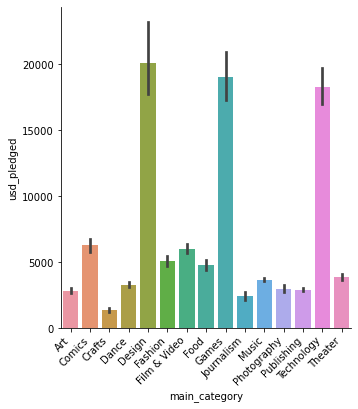

In [50]:
sns.catplot(kind = 'bar', data = df, x = 'main_category', y ='usd_pledged')
plt.xticks(rotation = 45, ha = 'right');

The same three selections have the most dollars pledged by far, but it is interested that there are more $ amount in the 'design' category when project state is not taken into account. Does this mean that design projects typically have more money pledged, but the rate of success is lower, since those that are successful have lower $ amount pledged? Or is just because successful technology projects generally require more funding, and have higher goal amounts? 

What about failed projects, would the data show something else? 

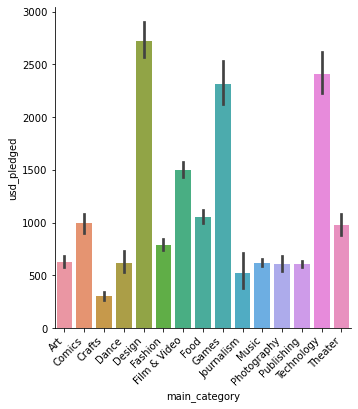

In [51]:
failed = df[df['state']=='failed']
sns.catplot(kind = 'bar', data = failed, x = 'main_category', y ='usd_pledged')
plt.xticks(rotation = 45, ha = 'right');

Interesting, again, there is more money peldged into the design cateogry of failed projects than in the technology category 

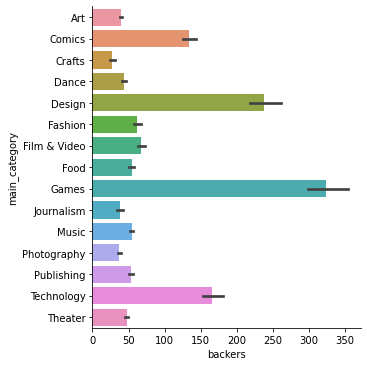

In [52]:
sns.catplot(kind = 'bar', data = df, x = 'backers', y ='main_category')

This shows that the comics cateogry, as well as design and games have more backers than technology, which alludes that technology has fewer backers, but since the usd_pledged amount is higher from the previvous graphs, each backer must be pledging more money than each backer of comics or the others. 

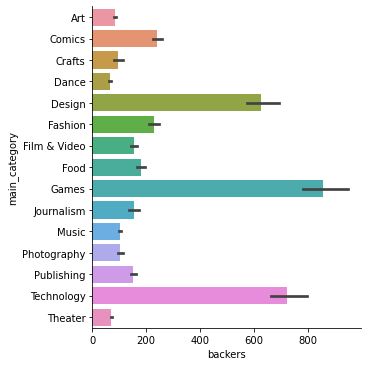

In [46]:
sns.catplot(kind = 'bar', data = successful, x = 'backers', y ='main_category')

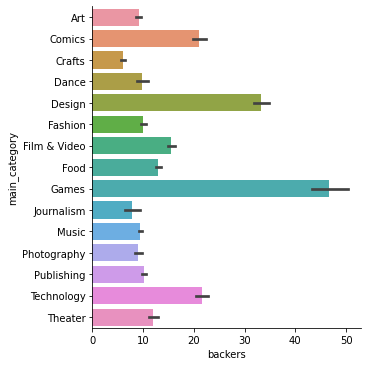

In [53]:
sns.catplot(kind = 'bar', data = failed, x = 'backers', y ='main_category')